# RVL-CDIP Dataset Exploration

This notebook explores the RVL-CDIP dataset for document classification.

In [2]:
from datasets import load_dataset

# We use streaming=True to avoid downloading the full dataset right away
dataset = load_dataset("rvl_cdip", split="train", streaming=True, trust_remote_code=True)

dataset

IterableDataset({
    features: ['image', 'label'],
    num_shards: 1
})

## Load the Dataset

We'll use the Hugging Face `datasets` library to load RVL-CDIP in streaming mode, which allows us to explore the data without downloading the entire dataset.

## Sample a Small Subset

Let's take a small sample of 200 documents for exploratory data analysis (EDA) without downloading the full dataset.

In [3]:
from itertools import islice

# Let's take a small sample for EDA
N_SAMPLES = 200

sample_list = list(islice(dataset, N_SAMPLES))
len(sample_list), type(sample_list[0])

(200, dict)

## Visualize Sample Images

Let's display a few sample images from the dataset along with their numeric labels to get a visual understanding of the data.

dict_keys(['image', 'label'])


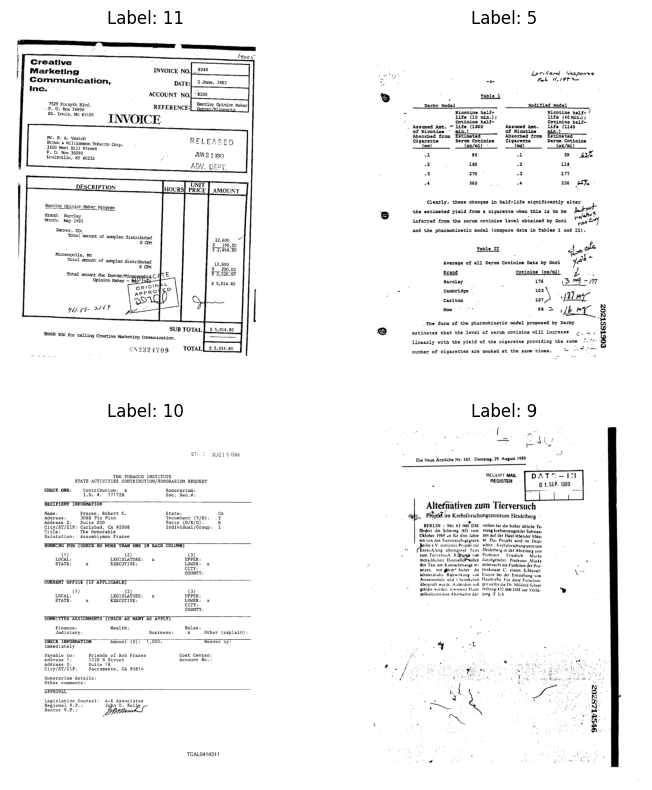

In [4]:
import matplotlib.pyplot as plt

# Let's see what keys we have
print(sample_list[0].keys())

# Show first 4 images with labels
plt.figure(figsize=(8, 8))
for i in range(4):
    item = sample_list[i]
    img = item["image"]   # PIL Image
    label = item["label"]

    plt.subplot(2, 2, i + 1)
    plt.imshow(img, cmap="gray")
    plt.axis("off")
    plt.title(f"Label: {label}")

plt.tight_layout()
plt.show()


## Define Label Names

RVL-CDIP has 16 document classes. Let's define the label names to make the numeric labels more readable.

In [5]:
LABEL_NAMES = [
    "letter",        # 0
    "form",          # 1
    "email",         # 2
    "handwritten",   # 3
    "advertisement", # 4
    "scientific",    # 5
    "scientific report", # 6
    "specification",     # 7
    "file folder",       # 8
    "news article",      # 9
    "budget",            # 10
    "invoice",           # 11
    "presentation",      # 12
    "questionnaire",     # 13
    "resume",            # 14
    "memo"               # 15
]

def get_label_name(idx):
    return LABEL_NAMES[idx]

# Test
for i in range(5):
    print(sample_list[i]["label"], "->", get_label_name(sample_list[i]["label"]))


11 -> invoice
5 -> scientific
10 -> budget
9 -> news article
6 -> scientific report


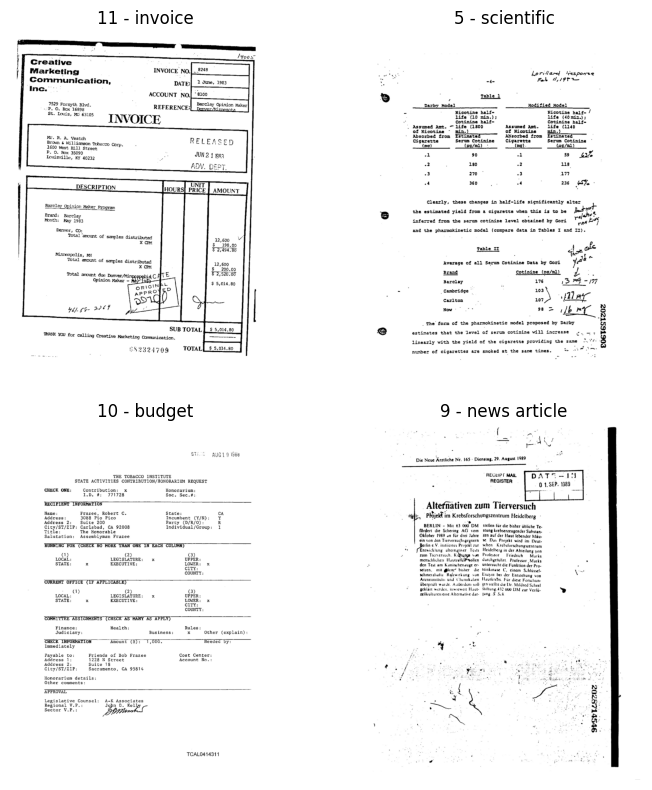

In [6]:
plt.figure(figsize=(8, 8))
for i in range(4):
    item = sample_list[i]
    img = item["image"]
    label = item["label"]
    label_name = get_label_name(label)

    plt.subplot(2, 2, i + 1)
    plt.imshow(img, cmap="gray")
    plt.axis("off")
    plt.title(f"{label} - {label_name}")

plt.tight_layout()
plt.show()


## Visualize with Label Names

Now let's display the same images but with human-readable label names instead of just numeric labels.

In [7]:
from collections import Counter

labels = [item["label"] for item in sample_list]
label_counts = Counter(labels)

print(label_counts)

# Convert to readable names
label_counts_named = {get_label_name(k): v for k, v in label_counts.items()}
label_counts_named


Counter({11: 16, 9: 16, 0: 16, 5: 15, 6: 15, 10: 13, 13: 13, 15: 13, 14: 13, 7: 12, 2: 12, 4: 10, 12: 10, 1: 10, 3: 8, 8: 8})


{'invoice': 16,
 'scientific': 15,
 'budget': 13,
 'news article': 16,
 'scientific report': 15,
 'handwritten': 8,
 'advertisement': 10,
 'presentation': 10,
 'form': 10,
 'questionnaire': 13,
 'specification': 12,
 'memo': 13,
 'letter': 16,
 'email': 12,
 'resume': 13,
 'file folder': 8}

## Analyze Label Distribution

Let's count how many samples we have for each document class in our 200-sample subset.

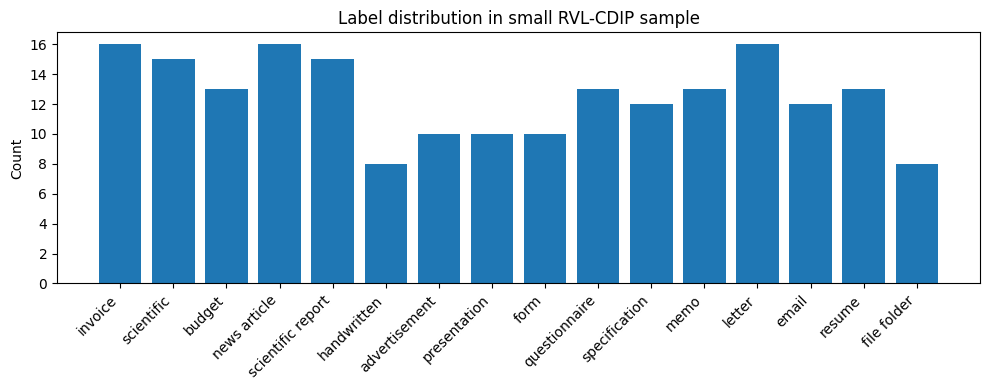

In [8]:
plt.figure(figsize=(10, 4))
names = list(label_counts_named.keys())
values = list(label_counts_named.values())

plt.bar(names, values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Count")
plt.title("Label distribution in small RVL-CDIP sample")
plt.tight_layout()
plt.show()


## Plot Label Distribution

Visualize the distribution of document classes in our sample with a bar chart.

## Save Sample for Later Use

Let's save this small sample (images + labels CSV) so we can quickly load it in future experiments without re-downloading.

In [10]:
import sys
from pathlib import Path

# Add project root to path
project_root = Path.cwd().parent
sys.path.insert(0, str(project_root))

from src.utils.paths import RAW_DATA_DIR

sample_dir = RAW_DATA_DIR / "rvl_cdip_sample"
sample_dir.mkdir(parents=True, exist_ok=True)

print("Saving to:", sample_dir)

Saving to: C:\Users\usman\ML_Projects\multi_input_ocr\data\raw\rvl_cdip_sample


In [11]:
import pandas as pd

rows = []
for i, item in enumerate(sample_list):
    img = item["image"]
    label = item["label"]
    label_name = get_label_name(label)

    img_filename = f"doc_{i:04d}.png"
    img_path = sample_dir / img_filename
    img.save(img_path)

    rows.append({
        "image_file": img_filename,
        "label": label,
        "label_name": label_name
    })

df = pd.DataFrame(rows)
csv_path = sample_dir / "labels.csv"
df.to_csv(csv_path, index=False)

csv_path, len(df)

(WindowsPath('C:/Users/usman/ML_Projects/multi_input_ocr/data/raw/rvl_cdip_sample/labels.csv'),
 200)